***
# <font color=green size=10>CURSO DE ESTATÍSTICA - PARTE 1</font>
***

## Trabalho de Análise Descritiva de um Conjunto de Dados

Utilizando os conhecimentos adquiridos em nosso treinamento realize uma análise descritiva básica de um conjunto de dados retirados da Pesquisa Nacional por Amostra de Domicílios - 2015 do IBGE. 

Vamos construir histogramas, calcular e avaliar medidas de tendência central, medidas separatrizes e de dispersão dos dados.

Siga o roteiro proposto e vá completando as células vazias. Procure pensar em mais informações interessantes que podem ser exploradas em nosso dataset.

# <font color=green>DATASET DO PROJETO</font>
***

### Pesquisa Nacional por Amostra de Domicílios - 2015

A <b>Pesquisa Nacional por Amostra de Domicílios - PNAD</b> investiga anualmente, de forma permanente, características gerais da população, de educação, trabalho, rendimento e habitação e outras, com periodicidade variável, de acordo com as necessidades de informação para o país, como as características sobre migração, fecundidade, nupcialidade, saúde, segurança alimentar, entre outros temas. O levantamento dessas estatísticas constitui, ao longo dos 49 anos de realização da pesquisa, um importante instrumento para formulação, validação e avaliação de políticas orientadas para o desenvolvimento socioeconômico e a melhoria das condições de vida no Brasil.

### Fonte dos Dados

https://ww2.ibge.gov.br/home/estatistica/populacao/trabalhoerendimento/pnad2015/microdados.shtm

### Variáveis utilizadas

> ### Renda (Variável Quantitativa Contínua)
> ***

Rendimento mensal do trabalho principal para pessoas de 10 anos ou mais de idade.

> ### Idade (Variável Quantitativa Discreta)
> ***

Idade do morador na data de referência em anos.

> ### Altura (Variável Quantitativa Contínua)
> ***

Altura do morador em metros.

> ### UF (Variável Qualitativa Nominal)
> ***

|Código|Descrição|
|---|---|
|11|Rondônia|
|12|Acre|
|13|Amazonas|
|14|Roraima|
|15|Pará|
|16|Amapá|
|17|Tocantins|
|21|Maranhão|
|22|Piauí|
|23|Ceará|
|24|Rio Grande do Norte|
|25|Paraíba|
|26|Pernambuco|
|27|Alagoas|
|28|Sergipe|
|29|Bahia|
|31|Minas Gerais|
|32|Espírito Santo|
|33|Rio de Janeiro|
|35|São Paulo|
|41|Paraná|
|42|Santa Catarina|
|43|Rio Grande do Sul|
|50|Mato Grosso do Sul|
|51|Mato Grosso|
|52|Goiás|
|53|Distrito Federal|

> ### Sexo (Variável Qualitativa Nominal)	
> ***

|Código|Descrição|
|---|---|
|0|Masculino|
|1|Feminino|

> ### Anos de Estudo (Variável Qualitativa Ordinal)
> ***

|Código|Descrição|
|---|---|
|1|Sem instrução e menos de 1 ano|
|2|1 ano|
|3|2 anos|
|4|3 anos|
|5|4 anos|
|6|5 anos|
|7|6 anos|
|8|7 anos|
|9|8 anos|
|10|9 anos|
|11|10 anos|
|12|11 anos|
|13|12 anos|
|14|13 anos|
|15|14 anos|
|16|15 anos ou mais|
|17|Não determinados| 
||Não aplicável|

> ### Cor (Variável Qualitativa Nominal)
> ***

|Código|Descrição|
|---|---|
|0|Indígena|
|2|Branca|
|4|Preta|
|6|Amarela|
|8|Parda|
|9|Sem declaração|

#### <font color='red'>Observação</font>
***
> Os seguintes tratamentos foram realizados nos dados originais:
> 1. Foram eliminados os registros onde a <b>Renda</b> era inválida (999 999 999 999);
> 2. Foram eliminados os registros onde a <b>Renda</b> era missing;
> 3. Foram considerados somente os registros das <b>Pessoas de Referência</b> de cada domicílio (responsável pelo domicílio).

***
***

### Utilize a célula abaixo para importar as biblioteca que precisar para executar as tarefas
#### <font color='red'>Sugestões: pandas, numpy, seaborn</font>

In [107]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
!pip install pd --upgrade -q
!pip install np --upgrade -q
!pip install sns --upgrade -q

  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done


In [108]:
print(pd.__version__)
print(np.__version__)
print(sns.__version__)

1.3.5
1.21.6
0.11.2


### Importe o dataset e armazene o conteúdo em uma DataFrame

In [109]:
df = pd.read_csv('dados.csv')
type(df)

pandas.core.frame.DataFrame

### Visualize o conteúdo do DataFrame

In [110]:
df.head(10)

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631
5,11,1,34,8,12,790,1.637906
6,11,0,57,8,12,3150,1.570078
7,11,1,60,8,12,1700,1.608495
8,11,1,50,4,14,1800,1.780329
9,11,0,26,8,12,1150,1.793203


### Para avaliarmos o comportamento da variável RENDA vamos construir uma tabela de frequências considerando as seguintes classes em salários mínimos (SM)

Classes de renda:

<b>A</b> ► Acima de 25 SM

<b>B</b> ► De 15 a 25 SM

<b>C</b> ► De 5 a 15 SM

<b>D</b> ► De 2 a 5 SM

<b>E</b> ► Até 2 SM

Para construir as classes de renda considere que o salário mínimo na época da pesquisa era de <b>R$ 788,00</b>.

#### Siga os passos abaixo:

### 1º Definir os intevalos das classes em reais (R$)

In [118]:
sm = 788
limites = [2, 5, 15, 25]
limites = [sm*limites[i] for i in range(len(limites))]
limites.insert(0, df['Renda'].min())
limites.append(df['Renda'].max())
limites

[0, 1576, 3940, 11820, 19700, 200000]

### 2º Definir os labels das classes

In [119]:
labels = ['E', 'D', 'C', 'B', 'A']
labels

['E', 'D', 'C', 'B', 'A']

### 3º Construir a coluna de frequências

In [120]:
freq_renda = pd.cut(x=df['Renda'], bins=limites, labels=labels, include_lowest=True)
freq_renda = freq_renda.value_counts()
freq_renda

E    49755
D    18602
C     7241
B      822
A      420
Name: Renda, dtype: int64

### 4º Construir a coluna de percentuais

In [121]:
freq_renda_porcent = pd.cut(x=df['Renda'], bins=limites, labels=labels, include_lowest=True)
freq_renda_porcent = (freq_renda_porcent.value_counts(normalize=True)*100).round(2)
freq_renda_porcent

E    64.75
D    24.21
C     9.42
B     1.07
A     0.55
Name: Renda, dtype: float64

### 5º Juntar as colunas de frequência e percentuais e ordenar as linhas de acordo com os labels das classes

In [122]:
df_renda = pd.DataFrame({"Frequência": freq_renda, "Porcentagem(%)": freq_renda_porcent})
df_renda.rename_axis("Classes", inplace=True) #Outro => df_renda.index.names = ["Classes"]
df_renda

,Frequência,Porcentagem(%)
Classes,,
E,49755,64.75
D,18602,24.21
C,7241,9.42
B,822,1.07
A,420,0.55


### Construa um gráfico de barras para visualizar as informações da tabela de frequências acima

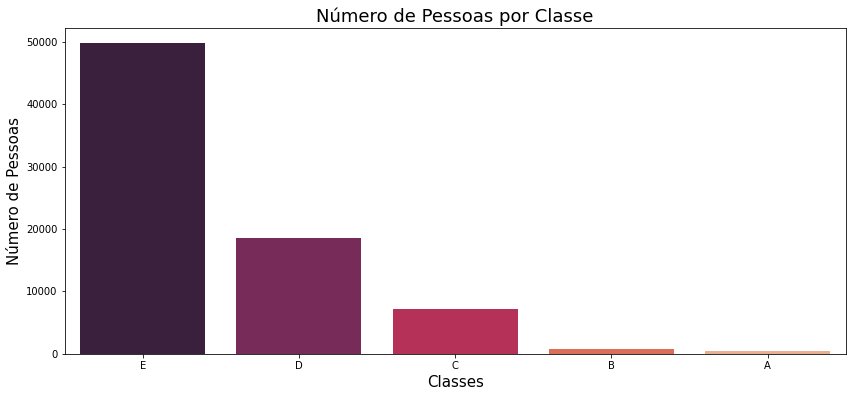

In [123]:
ax = sns.barplot(x=df_renda.index, y=df_renda['Frequência'], palette="rocket")
ax.figure.set_size_inches(14,6)
ax.set_xlabel('Classes', fontsize=15)
ax.set_ylabel('Número de Pessoas', fontsize=15)
ax.set_title('Número de Pessoas por Classe', fontsize=18)
#ax.bar_label(ax.containers[0])
ax

> ### Conclusões

É possível concluir que o Brasil é um país realmente desigual, visto que quase 90% da população faz parte da fatia mais pobre, ou seja, que recebe menos de 5 salários mínimos (classes E e D).

### Crie um histograma para as variáveis QUANTITATIVAS de nosso dataset


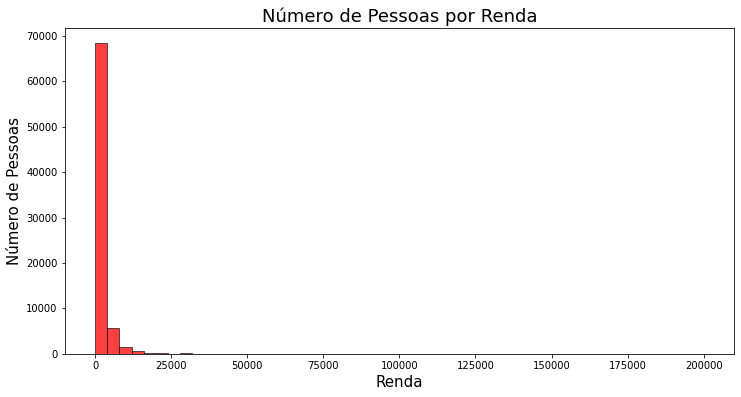

In [13]:
# RENDA
ax = sns.histplot(df['Renda'], bins=50, kde=False, color='red')
ax.figure.set_size_inches(12,6)
ax.set_xlabel('Renda', fontsize=15)
ax.set_ylabel('Número de Pessoas', fontsize=15)
ax.set_title('Número de Pessoas por Renda', fontsize=18)
ax

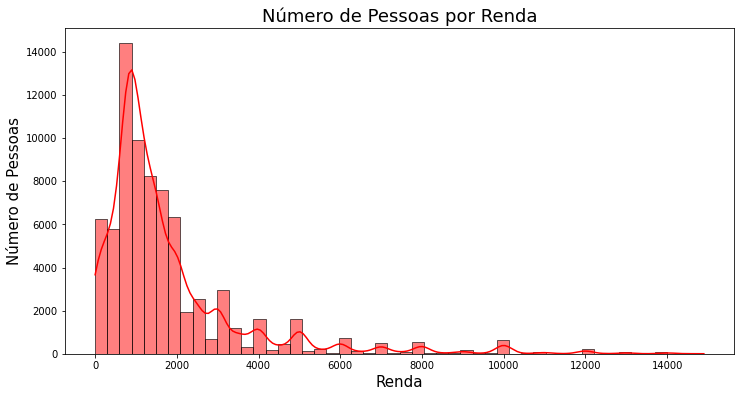

In [14]:
# RENDA SEM OUTLIER
ax = sns.histplot(df.query('Renda < 15000')['Renda'], bins=50, kde=True, color='red')
ax.figure.set_size_inches(12,6)
ax.set_xlabel('Renda', fontsize=15)
ax.set_ylabel('Número de Pessoas', fontsize=15)
ax.set_title('Número de Pessoas por Renda', fontsize=18)
ax

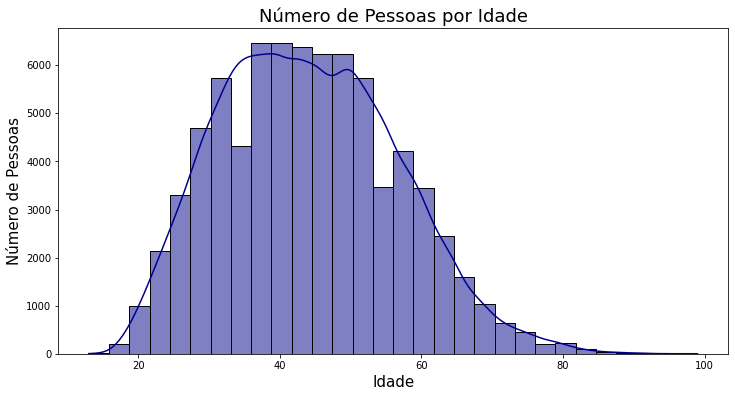

In [15]:
# IDADE
ax = sns.histplot(df['Idade'], bins=30, kde=True, color='darkblue')
ax.figure.set_size_inches(12,6)
ax.set_xlabel('Idade', fontsize=15)
ax.set_ylabel('Número de Pessoas', fontsize=15)
ax.set_title('Número de Pessoas por Idade', fontsize=18)
ax

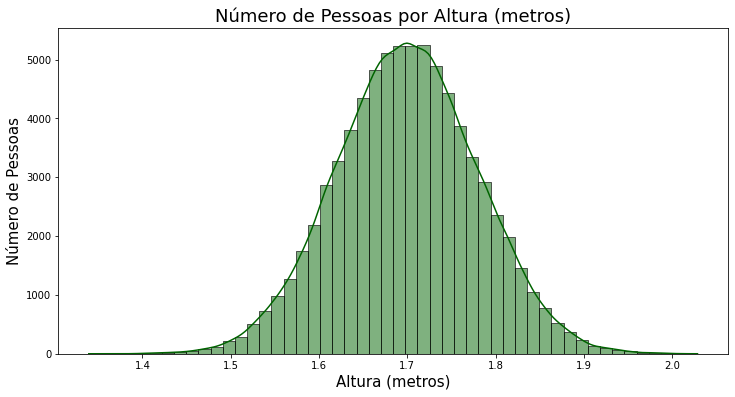

In [16]:
# ALTURA
ax = sns.histplot(df['Altura'], bins=50, kde=True, color='darkgreen')
ax.figure.set_size_inches(12,6)
ax.set_xlabel('Altura (metros)', fontsize=15)
ax.set_ylabel('Número de Pessoas', fontsize=15)
ax.set_title('Número de Pessoas por Altura (metros)', fontsize=18)
ax

> ### Conclusões

>> **Renda:** é possível notar que a renda é extremamente assimétrica para a direita. Isso acontece, pois a população entrevistada em geral recebe muito menos do que a sua parcela mais rica. Quando removemos os outliers (pessoas mais ricas), podemos enxergar o histograma com mais clareza.

>> **Idade:** assim como acontece com a Renda, há uma assimetria à direita (embora seja muito menor), devido ao caráter da entrevista que foi de falar com "pessoas de referência" da casa, ou seja, que trabalhassem e influenciassem economicamente mais a renda da família.

>> **Altura:** nessa variável existe quase uma simetria completa, já que a distribuição de frequência para a altura é feita de forma que sua Média = Mediana = Moda. 

### Construa uma tabela de frequências e uma com os percentuais do cruzando das variáveis SEXO e COR

In [104]:
sexo = {
    0: 'Masculino', 
    1: 'Feminino'
}
cor = {
    0: 'Indígena', 
    2: 'Branca', 
    4: 'Preta', 
    6: 'Amarela', 
    8: 'Parda', 
    9: 'Sem declaração'
}
anos_de_estudo = {
    1: 'Sem instrução e <1 ano', 
    2: '1 ano', 
    3: '2 anos', 
    4: '3 anos', 
    5: '4 anos', 
    6: '5 anos', 
    7: '6 anos', 
    8: '7 anos', 
    9: '8 anos', 
    10: '9 anos', 
    11: '10 anos', 
    12: '11 anos', 
    13: '12 anos', 
    14: '13 anos', 
    15: '14 anos', 
    16: '>15 anos', 
    17: 'Desconhecido'
}
uf = {
    11: 'RO', 
    12: 'AC', 
    13: 'AM', 
    14: 'RR', 
    15: 'PA', 
    16: 'AP', 
    17: 'TO', 
    21: 'MA', 
    22: 'PI', 
    23: 'CE', 
    24: 'RN', 
    25: 'PB', 
    26: 'PE', 
    27: 'AL', 
    28: 'SE', 
    29: 'BA', 
    31: 'MG', 
    32: 'ES', 
    33: 'RJ', 
    35: 'SP', 
    41: 'PR', 
    42: 'SC', 
    43: 'RS', 
    50: 'MS', 
    51: 'MT', 
    52: 'GO', 
    53: 'DF'
}

In [18]:
df_corsex = pd.crosstab(df['Sexo'], df['Cor'])
df_corsex.rename(index=sexo, columns=cor, inplace=True)
df_corsex

Cor,Indígena,Branca,Preta,Amarela,Parda
Sexo,,,,,
Masculino,256,22194,5502,235,25063
Feminino,101,9621,2889,117,10862


In [19]:
df_corsex = pd.crosstab(df['Sexo'], df['Cor'], normalize=True)*100
df_corsex.rename(index=sexo, columns=cor, inplace=True)
df_corsex

Cor,Indígena,Branca,Preta,Amarela,Parda
Sexo,,,,,
Masculino,0.333160,28.883394,7.160333,0.305830,32.617126
Feminino,0.131442,12.520822,3.759761,0.152264,14.135867


> ### Conclusões

Olhando para os dados coletados é possível concluir que quase 50% dos entrevistados são da cor Parda (representando a realidade do Brasil) e que homens ainda representam a maior parte das "pessoas de referência".

## Realize, para a variável RENDA, uma análise descritiva com as ferramentas que aprendemos em nosso treinamento

### Obtenha a média aritmética

In [20]:
media_renda = (df['Renda'].mean()).round(2)
media_renda

2000.38

### Obtenha a mediana

In [21]:
mediana_renda = df['Renda'].median()
mediana_renda

1200.0

### Obtenha a moda

In [22]:
moda_renda = df['Renda'].mode()[0]
moda_renda

788

### Obtenha o desvio médio absoluto

In [23]:
dma_renda = (df['Renda'].mad()).round(2)
dma_renda

1526.5

### Obtenha a variância

In [24]:
var_renda = (df['Renda'].var()).round(2)
var_renda

11044906.01

### Obtenha o desvio-padrão

In [25]:
dp_renda = (df['Renda'].std()).round(2)
dp_renda

3323.39

### Obtenha a média, mediana e valor máximo da variável RENDA segundo SEXO e COR

In [26]:
df_corsex_renda = pd.crosstab(df['Sexo'], df['Cor'], values=df['Renda'], aggfunc={'mean', 'median', 'max'}).round(2)
df_corsex_renda.rename(index=sexo, columns=cor, inplace=True)
df_corsex_renda

max                                           mean           \
Cor        Indígena    Branca    Preta  Amarela     Parda Indígena   Branca   
Sexo                                                                          
Masculino   10000.0  200000.0  50000.0  50000.0  100000.0  1081.71  2925.74   
Feminino   120000.0  100000.0  23000.0  20000.0   30000.0  2464.39  2109.87   

                                       median                                  
Cor          Preta  Amarela    Parda Indígena  Branca   Preta Amarela   Parda  
Sexo                                                                           
Masculino  1603.86  4758.25  1659.58    797.5  1700.0  1200.0  2800.0  1200.0  
Feminino   1134.60  3027.34  1176.76    788.0  1200.0   800.0  1500.0   800.0

> ### Conclusões

Através dos dados é possível concluir que, no Brasil, o homem tende a ganhar mais do que a mulher (ainda que tenha qualificações iguais ou piores) e pessoas de cor preta, parda ou indígena ainda não conseguem ocupar posições "valorizadas" (muitas vezes por falta de oportunidades melhores, como educação, saúde, etc.), ficando com uma média salarial bem menor do que brancos e amarelos.

### Obtenha as medidas de dispersão da variável RENDA segundo SEXO e COR

In [27]:
df_corsex_renda = pd.crosstab(df['Sexo'], df['Cor'], values=df['Renda'], aggfunc={'mad', 'var', 'std'}).round(1)
df_corsex_renda.rename(index=sexo, columns=cor, inplace=True)
df_corsex_renda

mad                                     std                  \
Cor       Indígena  Branca  Preta Amarela   Parda Indígena  Branca   Preta   
Sexo                                                                         
Masculino    798.9  2261.0  975.6  3709.6  1125.8   1204.1  4750.8  1936.3   
Feminino    3007.9  1671.0  705.5  2549.1   811.6  11957.5  3251.0  1349.8   

                                   var                                     \
Cor       Amarela   Parda     Indígena      Branca      Preta     Amarela   
Sexo                                                                        
Masculino  5740.8  2312.1    1449841.1  22570023.4  3749293.6  32957069.6   
Feminino   3731.2  1596.2  142981765.4  10569086.5  1821959.5  13921656.9   

                      
Cor            Parda  
Sexo                  
Masculino  5345747.1  
Feminino   2547959.9

> ### Conclusões

Apesar de serem as mais bem remuneradas (em média), pessoas brancas e amarelas são as que mais demonstram desvio padrão amostral, ou seja, quando estamos analisando brancos e amarelos é provável que existam poucos ganhando muito e muitos ganhando relativamente pouco. É possível enxergar também uma tendência para que homens recebam salários mais desiguais entre si do que as mulheres.

### Construa um box plot da variável RENDA segundo SEXO e COR


dict_values(['Indígena', 'Branca', 'Preta', 'Amarela', 'Parda', 'Sem declaração'])


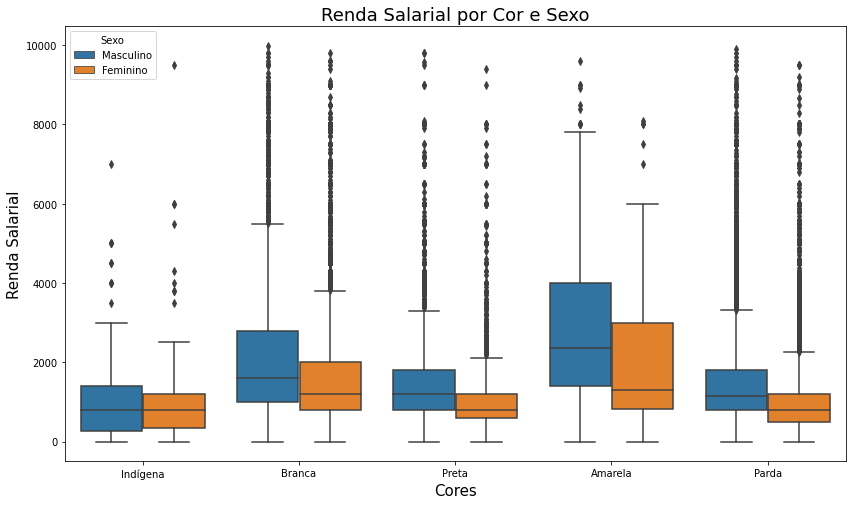

In [125]:
ax = sns.boxplot(data=df.query('Renda < 10000'), x='Cor', y='Renda', hue='Sexo')
ax.figure.set_size_inches(14,8)
#ax.legend(labels=['Masculino', 'Feminino'], shadow=True, fontsize=11)
ax.legend_.texts[0].set_text(sexo[0])
ax.legend_.texts[1].set_text(sexo[1])
ax.set_xlabel('Cores', fontsize=15)
ax.set_xticklabels(labels=cor.values())
ax.set_ylabel('Renda Salarial', fontsize=15)
ax.set_title('Renda Salarial por Cor e Sexo', fontsize=18)
print(cor.values())

> ### Conclusões

É possível concluir que Pardos, Pretos e Indígenas recebem salários mais iguais entre si e que, entre Brancos e Amarelos a diferença salarial é mais discrepante (já que seus quartis são mais distantes entre si). A ocorrência de outliers é muito presente em Pardos devido à quantidade maior de pessoas entrevistadas dessa cor.

# <font color="red">DESAFIO<font>
### Qual percentual de pessoas de nosso <i>dataset</i> ganham um salário mínimo (R$ 788,00) ou menos?


In [49]:
from scipy import stats

stats.percentileofscore([1, 2, 3, 3, 5], 4)  #Calcula a porcentagem de valores dentro da lista que estão abaixo do score (passado como segundo parâmetro)

80.0

In [134]:
porcentagem_salario = stats.percentileofscore(df['Renda'], 788, kind='weak')
print("{:.2f}% das pessoas recebem um salário igual ou menor a R$788.00".format(porcentagem_salario))

28.87% das pessoas recebem um salário igual ou menor a R$788.00


### Qual o valor máximo ganho por 99% das pessoas de nosso <i>dataset</i>?

In [136]:
val_max = df['Renda'].quantile(.99)
print("O valor máximo ganho por 99% das pessoas é R${:.2f}".format(val_max))

O valor máximo ganho por 99% das pessoas é R$15000.00


### Obtenha a média, mediana, valor máximo e desvio-padrão da variável RENDA segundo ANOS DE ESTUDO e SEXO

In [105]:
stats_renda = pd.crosstab(df['Anos de Estudo'], df['Sexo'], values=df['Renda'], aggfunc=['mean', 'median', 'max', 'std']).round(2)
stats_renda.rename(index=anos_de_estudo, columns=sexo, inplace=True)
stats_renda

mean             median                max  \
Sexo                   Masculino Feminino Masculino Feminino Masculino   
Anos de Estudo                                                           
Sem instrução e <1 ano    799.49   516.20       700      390     30000   
1 ano                     895.63   492.77       788      400     30000   
2 anos                    931.18   529.91       788      450     40000   
3 anos                   1109.20   546.85       800      500     80000   
4 anos                   1302.33   704.28      1000      788     50000   
5 anos                   1338.65   781.39      1045      788     35000   
6 anos                   1448.88   833.73      1200      788     25000   
7 anos                   1465.50   830.75      1200      788     40000   
8 anos                   1639.40   933.62      1300      800     30000   
9 anos                   1508.04   868.02      1200      788     60000   
10 anos                  1731.27   925.92      1218      800     45000   
11 anos                  2117.06  1286.79      1500     1000    200000   
12 anos                  2470.33  1682.31      1800     1200     30000   
13 anos                  3195.10  1911.73      2400     1300     25000   
14 anos                  3706.62  2226.46      2500     1600     50000   
>15 anos                 6134.28  3899.51      4000     2800    200000   
Desconhecido             1295.76   798.17      1200      788      7000   

                                      std           
Sexo                   Feminino Masculino Feminino  
Anos de Estudo                                      
Sem instrução e <1 ano    10000   1023.90   639.31  
1 ano                      2000   1331.95   425.29  
2 anos                     4000   1435.17   498.23  
3 anos                     3500   2143.80   424.12  
4 anos                    10000   1419.82   629.55  
5 anos                     8000   1484.65   635.78  
6 anos                     6000   1476.63   574.55  
7 anos                     9000   1419.71   602.04  
8 anos                    18000   1515.58   896.78  
9 anos                    20000   2137.66   973.22  
10 anos                    6000   2078.61   620.61  
11 anos                  100000   2676.54  1819.04  
12 anos                  120000   2268.08  4851.83  
13 anos                   20000   2797.12  2053.79  
14 anos                   20000   3987.21  2064.08  
>15 anos                 100000   7447.61  4212.77  
Desconhecido               3000    979.65   459.99

### Construa um box plot da variável RENDA segundo ANOS DE ESTUDO e SEXO


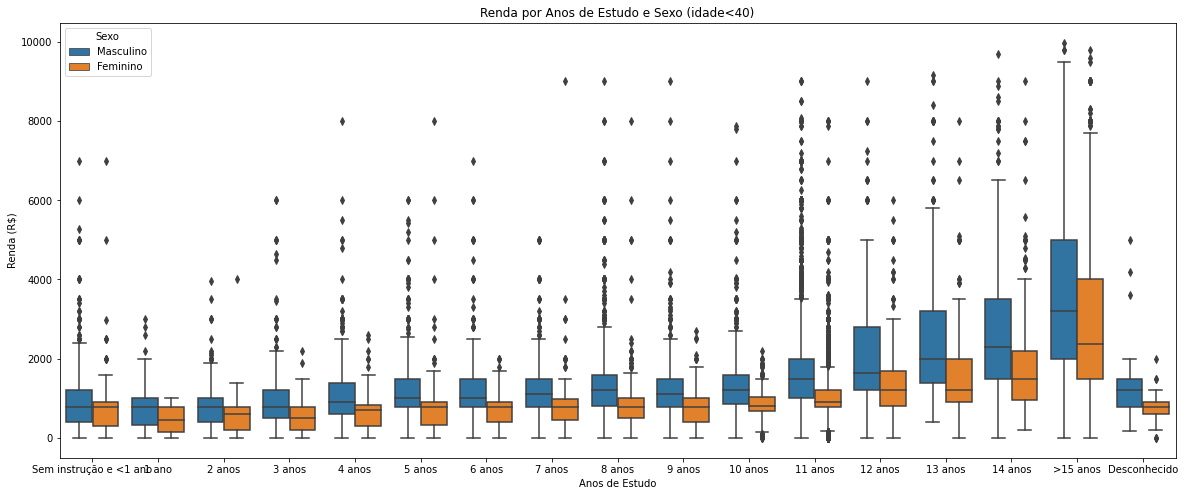

In [106]:
ax = sns.boxplot(data=df.query('Renda<10000 and Idade<40'), x='Anos de Estudo', y='Renda', hue='Sexo')
ax.figure.set_size_inches(20,8)
ax.legend_.texts[0].set_text(sexo[0])
ax.legend_.texts[1].set_text(sexo[1])
ax.set_xlabel('Anos de Estudo')
ax.set_xticklabels(labels=anos_de_estudo.values())
ax.set_ylabel('Renda (R$)')
ax.set_title('Renda por Anos de Estudo e Sexo (idade<40)')
ax

> ### Conclusões

É possível encontrar uma maior dispersão de frequência a medida que as pessoas vão ficando mais velhas, visto que os valores dos quartis estão mais espaçados entre si.

### Obtenha a média, mediana, valor máximo e desvio-padrão da variável RENDA segundo as UNIDADES DA FEDERAÇÃO

In [137]:
df_renda_uf = df.groupby(['UF']).agg({'Renda': ['mean', 'median', 'max', 'std']}).round(2)
df_renda_uf.rename(index=uf, inplace=True)
df_renda_uf

Renda                         
       mean  median     max      std
UF                                  
RO  1789.76  1200.0   50000  2406.16
AC  1506.09   900.0   30000  2276.23
AM  1445.13   900.0   22000  1757.94
RR  1783.59  1000.0   20000  2079.66
PA  1399.08   850.0   50000  2053.78
AP  1861.35  1200.0   15580  2020.69
TO  1771.09  1000.0   60000  2934.59
MA  1019.43   700.0   30000  1887.82
PI  1074.55   750.0   40000  2373.36
CE  1255.40   789.0   25000  1821.96
RN  1344.72   800.0   15500  1651.81
PB  1293.37   788.0   30000  1950.27
PE  1527.08   900.0   50000  2389.62
AL  1144.55   788.0   11000  1237.86
SE  1109.11   788.0   16000  1479.00
BA  1429.65   800.0  200000  3507.92
MG  2056.43  1200.0  100000  3584.72
ES  2026.38  1274.0  100000  3513.85
RJ  2496.40  1400.0  200000  5214.58
SP  2638.10  1600.0   80000  3503.78
PR  2493.87  1500.0  200000  4302.94
SC  2470.85  1800.0   80000  3137.65
RS  2315.16  1500.0   35000  2913.34
MS  2262.60  1500.0   42000  3031.42
MT  2130.65  1500.0   35000  2542.63
GO  1994.58  1500.0   30000  2221.93
DF  4241.95  2000.0  100000  5550.46

### Construa um box plot da variável RENDA segundo as UNIDADES DA FEDERAÇÃO
#### <font color='red'>Obs.: Utilizando somente as informações de pessoas com renda abaixo de R$ 10.000</font>

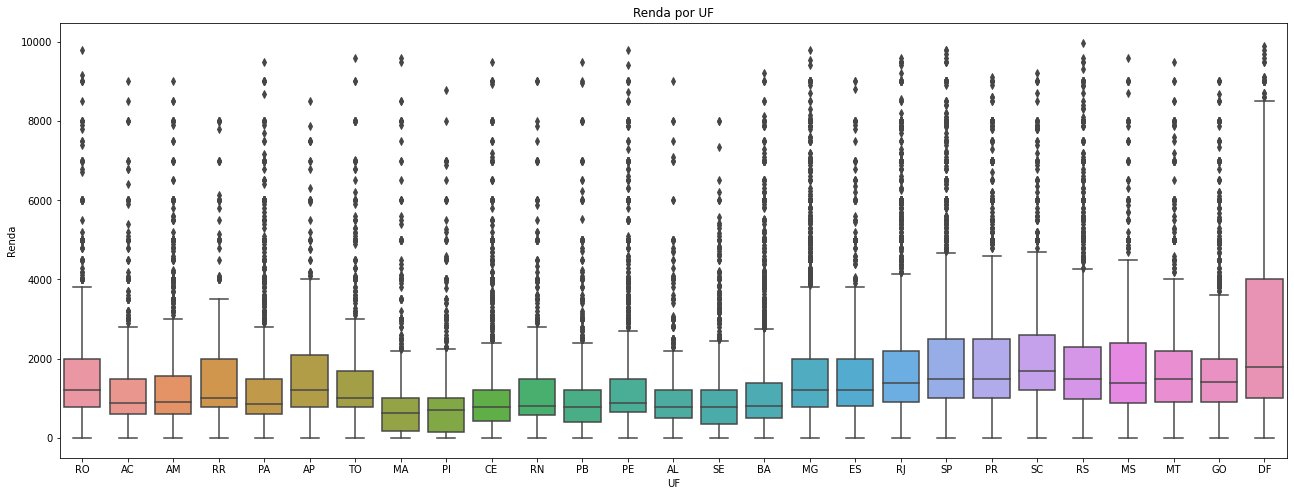

In [103]:
ax = sns.boxplot(data=df.query('Renda<10000'), x='UF', y='Renda')
ax.figure.set_size_inches(22,8)
ax.set_xlabel('UF')
ax.set_xticklabels(labels=uf.values())
ax.set_ylabel('Renda')
ax.set_title('Renda por UF')
ax

> ### Conclusões

É possível observar que estados do Nordeste possuem uma representação de renda abaixo de outras regiões. Pelas observações, também é possível ver que as regiões Sudeste, Sul e Centro-Oeste possuem uma mediana salarial maior, com destaque para o Distrito Federal, que possui a maior mediana e provavelmente a maior média de todos os estados.